In [404]:
import numpy as np
import pandas as pd

In [405]:
from datetime import datetime

In [406]:
from plotly import graph_objects as go

### creating some cuts in data

In [407]:
all_case_data = pd.read_csv("../covid-confirmed-cases-since-100th-case.csv")

In [408]:
all_case_data['date'] = all_case_data['Date'].astype("datetime64")

In [409]:
India_case_data = all_data.query("Entity=='India'")

In [410]:
India_case_data.head()


,Entity,Code,Date,Total confirmed cases (cases),Days since the 100th total confirmed case (days),date,entity,type,Cumulative total tests,case_per_test
3361,India,IND,"Dec 31, 2019",0.0,NaN,2019-12-31,NaN,NaN,NaN,NaN
3362,India,IND,"Jan 1, 2020",0.0,NaN,2020-01-01,NaN,NaN,NaN,NaN
3363,India,IND,"Jan 2, 2020",0.0,NaN,2020-01-02,NaN,NaN,NaN,NaN
3364,India,IND,"Jan 3, 2020",0.0,NaN,2020-01-03,NaN,NaN,NaN,NaN
3365,India,IND,"Jan 4, 2020",0.0,NaN,2020-01-04,NaN,NaN,NaN,NaN


In [411]:
cutoff_date = np.datetime64('2020-03-01')

In [412]:
India_case_data_recent = India_case_data.loc[India_case_data['date']>=cutoff_date,:]

In [413]:
all_test_data = pd.read_csv("../full-list-total-tests-for-covid-19.csv")

In [414]:
all_test_data['date'] = all_test_data['Date'].astype("datetime64")

In [415]:
all_test_data.head()

,Entity,Code,Date,Cumulative total tests,date
0,Australia - units unclear,NaN,"Mar 22, 2020",143056,2020-03-22
1,Australia - units unclear,NaN,"Mar 29, 2020",211261,2020-03-29
2,Australia - units unclear,NaN,"Apr 2, 2020",261000,2020-04-02
3,Austria - units unclear,NaN,"Feb 25, 2020",218,2020-02-25
4,Austria - units unclear,NaN,"Feb 26, 2020",321,2020-02-26


In [416]:
India_test_data = all_test_data.query("Entity=='India - samples tested'")

In [417]:
all_test_data['type'] = all_test_data['Entity'].str.split('-', 1, expand=True)[1]
all_test_data['entity'] = all_test_data['Entity'].str.split('-', 1, expand=True)[0].map(lambda x: x[:-1])

In [418]:
India_data_recent = India_data.loc[India_data['date']>=cutoff_date,:]

In [419]:
all_test_data_samples = all_test_data.query("type == ' samples tested'")

In [420]:
all_test_data_people = all_test_data.query("type == ' people tested'")

In [421]:
all_test_data_people.query('entity=="India"')

,Entity,Code,Date,Cumulative total tests,date,type,entity
125,India - people tested,NaN,"Mar 6, 2020",3404,2020-03-06,people tested,India
126,India - people tested,NaN,"Mar 13, 2020",5900,2020-03-13,people tested,India
127,India - people tested,NaN,"Mar 18, 2020",12235,2020-03-18,people tested,India
128,India - people tested,NaN,"Mar 19, 2020",12426,2020-03-19,people tested,India
129,India - people tested,NaN,"Mar 20, 2020",13486,2020-03-20,people tested,India
130,India - people tested,NaN,"Mar 21, 2020",14811,2020-03-21,people tested,India
131,India - people tested,NaN,"Mar 22, 2020",16109,2020-03-22,people tested,India
132,India - people tested,NaN,"Mar 23, 2020",19817,2020-03-23,people tested,India
133,India - people tested,NaN,"Mar 24, 2020",19974,2020-03-24,people tested,India
134,India - people tested,NaN,"Mar 25, 2020",24254,2020-03-25,people tested,India


In [422]:
all_case_data.columns

Index(['Entity', 'Code', 'Date', 'Total confirmed cases (cases)',
       'Days since the 100th total confirmed case (days)', 'date'],
      dtype='object')

In [423]:
all_test_data.columns

Index(['Entity', 'Code', 'Date', 'Cumulative total tests', 'date', 'type',
       'entity'],
      dtype='object')

### merging data

In [424]:
all_case_data.head()

,Entity,Code,Date,Total confirmed cases (cases),Days since the 100th total confirmed case (days),date
0,Afghanistan,AFG,"Dec 31, 2019",0.0,NaN,2019-12-31
1,Afghanistan,AFG,"Jan 1, 2020",0.0,NaN,2020-01-01
2,Afghanistan,AFG,"Jan 2, 2020",0.0,NaN,2020-01-02
3,Afghanistan,AFG,"Jan 3, 2020",0.0,NaN,2020-01-03
4,Afghanistan,AFG,"Jan 4, 2020",0.0,NaN,2020-01-04


In [425]:
all_test_data.type.unique()

array([' units unclear', ' tests performed', ' people tested',
       ' samples tested', ' cases tested',
       ' inconsistent units (COVID Tracking Project)',
       ' specimens tested (CDC)'], dtype=object)

In [426]:
all_data = all_case_data.merge(all_test_data_people[['entity','type','Date','Cumulative total tests']], how = 'left',left_on = ['Entity','Date'], right_on = ['entity','Date'])

In [427]:
all_data['case_per_test'] = all_data['Total confirmed cases (cases)'] / all_data['Cumulative total tests']

In [428]:
India_data = all_data.query("Entity == 'India'")

In [429]:
UK_data = all_data.query("Entity == 'United Kingdom'")
#all_data['Entity'].unique()

In [430]:
Canada_data = all_data.query("Entity == 'Canada'")
#all_data['Entity'].unique()

In [431]:
Japan_data = all_data.query("Entity == 'Japan'")
#all_data['Entity'].unique()

In [432]:
UK_data_recent = UK_data.loc[UK_data['date']>=cutoff_date]

In [433]:
India_data_recent = India_data.loc[India_data['date']>=cutoff_date]

In [434]:
Canada_data_recent = Canada_data.loc[Canada_data['date']>=cutoff_date]

In [435]:
Japan_data_recent = Japan_data.loc[Japan_data['date']>=cutoff_date]

In [436]:
all_data['entity'].unique()

array([nan, 'Canada', 'India', 'Japan', 'United Kingdom'], dtype=object)

### PLotting

In [437]:
UK_data_recent.head()

,Entity,Code,Date,Total confirmed cases (cases),Days since the 100th total confirmed case (days),date,entity,type,Cumulative total tests,case_per_test
7984,United Kingdom,GBR,"Mar 1, 2020",23.0,NaN,2020-03-01,United Kingdom,people tested,11750.0,0.001957
7985,United Kingdom,GBR,"Mar 2, 2020",36.0,NaN,2020-03-02,United Kingdom,people tested,13525.0,0.002662
7986,United Kingdom,GBR,"Mar 3, 2020",40.0,NaN,2020-03-03,United Kingdom,people tested,13911.0,0.002875
7987,United Kingdom,GBR,"Mar 4, 2020",51.0,NaN,2020-03-04,United Kingdom,people tested,16659.0,0.003061
7988,United Kingdom,GBR,"Mar 5, 2020",85.0,NaN,2020-03-05,United Kingdom,people tested,18083.0,0.004701


In [438]:
from plotly import graph_objects as go

In [439]:
UK_Bar = go.Bar(x = UK_data_recent['date'],
               y = UK_data_recent['case_per_test'],
               name = 'UK')

In [440]:
India_Bar = go.Bar(x = India_data_recent['date'],
               y = India_data_recent['case_per_test'],
                  name = 'India')

In [441]:
Canada_Bar = go.Bar(x = Canada_data_recent['date'],
               y = Canada_data_recent['case_per_test'],
                  name = 'Canada')

In [442]:
Japan_Bar = go.Bar(x = Japan_data_recent['date'],
               y = Japan_data_recent['case_per_test'],
                  name = 'Japan')

In [443]:
UK_Line = go.Scatter(x = UK_data_recent['date'],
               y = UK_data_recent['case_per_test'],
               name = 'UK',
                    mode = 'lines')

In [444]:
India_Line = go.Scatter(x = India_data_recent['date'],
               y = India_data_recent['case_per_test'],
                  name = 'India',
                       mode = 'lines')

In [445]:
Canada_Line = go.Scatter(x = Canada_data_recent['date'],
               y = Canada_data_recent['case_per_test'],
                  name = 'Canada',
                       mode = 'lines')

In [447]:
Japan_Line = go.Scatter(x = Japan_data_recent['date'],
               y = Japan_data_recent['case_per_test'],
                  name = 'Japan',
                       mode = 'lines')

In [452]:
fig = go.Figure(data = [#UK_Bar,
                       #India_Bar,
                       UK_Line,
                       India_Line,
                       #Canada_Bar,
                       Canada_Line,
                       #Japan_Bar,
                       Japan_Line],
               layout_title_text = 'Case_per_test recent')

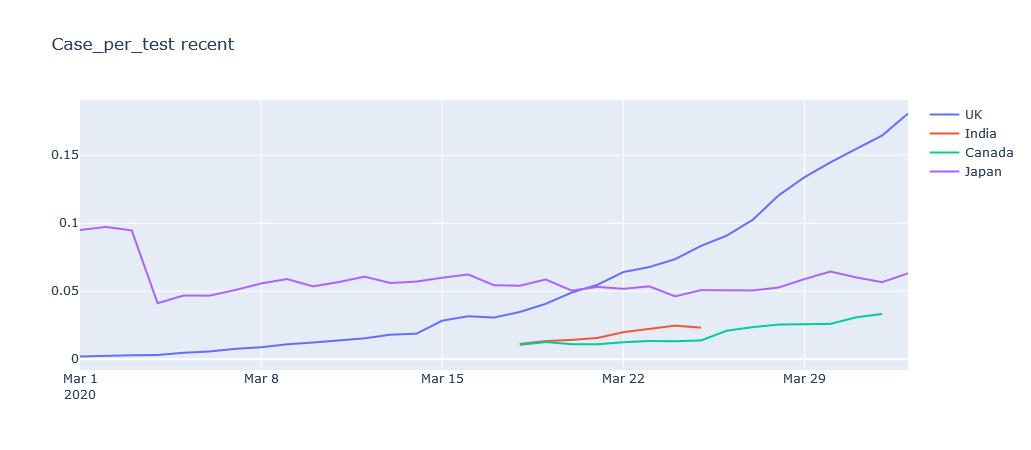

In [453]:
fig.show()